In [ ]:
Esse notebook tem as seguintes configurações:
    a output layer se liga à segunda camada
    população de neurônios 128, 64, 32
    learning rate Nadam (0.001 default)
    dropout 0.2
    batch size 36
    50 épocas

In [1]:
from astropy.io import fits
import os
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd

def open_fits_catalog(fits_file):
    hdu_list=fits.open(fits_file, ignore_missing_end=True)
    #print hdu_list
    hdu = hdu_list[1]    # table extensions can't be the first extension, so there's a dummy image extension at 0
    #print hdu.header
    cat_table = Table(hdu.data)
    cols=hdu.columns
    return cat_table, cols

In [2]:
data_file = os.path.join('proj1.fits')
data, _ = open_fits_catalog(data_file)

In [3]:
BANDS = ["R","Z", "G", "W1", "W2"]
mags = ['MAG_'+band for band in BANDS]
#definimos aqui as bandas que vamos usar

In [4]:
#preprocessing

from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)

# queremos 10% de teste
test_percentual = 1/10
#vou selecionar os 10%
test_cut = np.random.uniform(0, 1, len(data)) < test_percentual
#salvar os 10% na variável test_data
test_data = data[test_cut]

#selecionar os outros 90%
train_val_data = data[~test_cut]

#calcular os 5 grupos cada um com 18%, A, B, C, D e E
#para A
A_percentual = 1/5
A_cut = np.random.uniform(0, 1, len(train_val_data)) < A_percentual
A_data = train_val_data[A_cut]

#72%
train_val_data2 = train_val_data[~A_cut]

#para B
B_percentual = 1/4
B_cut = np.random.uniform(0, 1, len(train_val_data2)) < B_percentual
B_data = train_val_data2[B_cut]

#54%
train_val_data3 = train_val_data2[~B_cut]

#para C
C_percentual = 1/3
C_cut = np.random.uniform(0, 1, len(train_val_data3)) < C_percentual
C_data = train_val_data3[C_cut]

#36%
train_val_data4 = train_val_data3[~C_cut]

#para D
D_percentual = 1/2
D_cut = np.random.uniform(0, 1, len(train_val_data4)) < D_percentual
D_data = train_val_data4[D_cut] 

#18%
#para E
E_data = train_val_data4[~D_cut] 


df1 = A_data.to_pandas()
#print(df1)

df2 = B_data.to_pandas()
#print(df2)

df3 = C_data.to_pandas()
#print(df3)

df4 = D_data.to_pandas()
#print(df4)

df5 = E_data.to_pandas()
#print(df5)


#Agora é necessário juntar as coisas em 5 novos grupos:

train_datadf1 = df2.append([df3, df4, df5], ignore_index=True)
#print(train_datadf1)

train_datadf2 = df1.append([df3, df4, df5], ignore_index=True)
#print(train_datadf2)

train_datadf3 = df1.append([df2, df4, df5], ignore_index=True)
#print(train_datadf3)

train_datadf4 = df1.append([df2, df3, df5], ignore_index=True)
#print(train_datadf4)

train_datadf5 = df1.append([df2, df3, df4], ignore_index=True)
#print(train_datadf5)


#grupo 1: A é val_data1, B, C, D e E são train_data1
val_data1 = A_data
train_data1 = Table.from_pandas(train_datadf1)

#grupo 2: B é val_data2, A, C, D e E são train_data2
val_data2 = B_data
train_data2 = Table.from_pandas(train_datadf2)

#grupo 3: C é val_data3, A, B, D e E são train_data3
val_data3 = C_data
train_data3 = Table.from_pandas(train_datadf3)

#grupo 4: D é val_data4, A, B, C e E são train_data4
val_data4 = D_data
train_data4 = Table.from_pandas(train_datadf4)

#grupo 5: D é val_data5, A, B, C e D são train_data5
val_data5 = E_data
train_data5 = Table.from_pandas(train_datadf5)


print(f'Test Percent = {len(test_data)/len(data)*100:.2f}%')

print(f'Train Percent1 = {len(train_data1)/len(data)*100:.2f}%')
print(f'Val Percent1 = {len(val_data1)/len(data)*100:.2f}%')

print(f'Train Percent2 = {len(train_data2)/len(data)*100:.2f}%')
print(f'Val Percent2 = {len(val_data2)/len(data)*100:.2f}%')

print(f'Train Percent3 = {len(train_data3)/len(data)*100:.2f}%')
print(f'Val Percent3 = {len(val_data3)/len(data)*100:.2f}%')

print(f'Train Percent4 = {len(train_data4)/len(data)*100:.2f}%')
print(f'Val Percent4 = {len(val_data4)/len(data)*100:.2f}%')

print(f'Train Percent5 = {len(train_data5)/len(data)*100:.2f}%')
print(f'Val Percent5 = {len(val_data5)/len(data)*100:.2f}%')


Test Percent = 9.99%
Train Percent1 = 71.98%
Val Percent1 = 18.03%
Train Percent2 = 72.01%
Val Percent2 = 18.00%
Train Percent3 = 72.02%
Val Percent3 = 17.99%
Train Percent4 = 72.03%
Val Percent4 = 17.98%
Train Percent5 = 71.99%
Val Percent5 = 18.01%


In [5]:
#embaralhando os dados

#embaralhando o teste
test_shuffler = np.random.choice(len(test_data), len(test_data), replace=False)
test_data = test_data[test_shuffler]

#embaralhando grupo 1

train_shuffler1 = np.random.choice(len(train_data1), len(train_data1), replace=False)
train_data1 = train_data1[train_shuffler1]

val_shuffler1 = np.random.choice(len(val_data1), len(val_data1), replace=False)
val_data1 = val_data1[val_shuffler1]

#embaralhando grupo 2

train_shuffler2 = np.random.choice(len(train_data2), len(train_data2), replace=False)
train_data2 = train_data2[train_shuffler2]

val_shuffler2 = np.random.choice(len(val_data2), len(val_data2), replace=False)
val_data2 = val_data2[val_shuffler2]

#embaralhando grupo 3

train_shuffler3 = np.random.choice(len(train_data3), len(train_data3), replace=False)
train_data3 = train_data3[train_shuffler3]

val_shuffler3 = np.random.choice(len(val_data3), len(val_data3), replace=False)
val_data3 = val_data3[val_shuffler3]

#embaralhando grupo 4

train_shuffler4 = np.random.choice(len(train_data4), len(train_data4), replace=False)
train_data4 = train_data4[train_shuffler4]

val_shuffler4 = np.random.choice(len(val_data4), len(val_data4), replace=False)
val_data4 = val_data4[val_shuffler4]

#embaralhando grupo 5

train_shuffler5 = np.random.choice(len(train_data5), len(train_data5), replace=False)
train_data5 = train_data5[train_shuffler1]

val_shuffler5 = np.random.choice(len(val_data5), len(val_data5), replace=False)
val_data5 = val_data5[val_shuffler5]


#especificando os dados que usaremos para testar (mags, x_train) e os dados resposta (zspec, y_train)

x_test = np.array([test_data.field(mag) for mag in mags]).T
y_test = np.array(test_data.field('zspec'))

#especificando os dados que usaremos para treinar (mags, x_train) e os dados resposta (zspec, y_train)

x_train1 = np.array([train_data1.field(mag) for mag in mags]).T
y_train1 = np.array(train_data1.field('zspec'))

x_train2 = np.array([train_data2.field(mag) for mag in mags]).T
y_train2 = np.array(train_data2.field('zspec'))

x_train3 = np.array([train_data3.field(mag) for mag in mags]).T
y_train3 = np.array(train_data3.field('zspec'))

x_train4 = np.array([train_data4.field(mag) for mag in mags]).T
y_train4 = np.array(train_data4.field('zspec'))

x_train5 = np.array([train_data5.field(mag) for mag in mags]).T
y_train5 = np.array(train_data5.field('zspec'))

#especificando os dados que usaremos para validação (mags, x_train) e os dados resposta (zspec, y_train)

x_val1 = np.array([val_data1.field(mag) for mag in mags]).T
y_val1 = np.array(val_data1.field('zspec'))

x_val2 = np.array([val_data2.field(mag) for mag in mags]).T
y_val2 = np.array(val_data2.field('zspec'))

x_val3 = np.array([val_data3.field(mag) for mag in mags]).T
y_val3 = np.array(val_data3.field('zspec'))

x_val4 = np.array([val_data4.field(mag) for mag in mags]).T
y_val4 = np.array(val_data4.field('zspec'))

x_val5 = np.array([val_data5.field(mag) for mag in mags]).T
y_val5 = np.array(val_data5.field('zspec'))


scaler = MinMaxScaler()
x_train1 = scaler.fit_transform(x_train1)
x_val1 = scaler.transform(x_val1)
x_train2 = scaler.transform(x_train2)
x_val2 = scaler.transform(x_val2)
x_train3 = scaler.transform(x_train3)
x_val3 = scaler.transform(x_val3)
x_train4 = scaler.transform(x_train4)
x_val4 = scaler.transform(x_val4)
x_train5 = scaler.transform(x_train5)
x_val5 = scaler.transform(x_val5)
x_test = scaler.transform(x_test)

# np.max(x_test[:, 1])

In [6]:
import tensorflow.keras as keras
# os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
# os.environ['CUDA_VISIBLE_DEVICES'] = "1"


def build_model(input_shape, nb_classes=1):
    input_layer = keras.layers.Input(input_shape)

    layer_1 = keras.layers.Dense(128, activation='relu')(input_layer)
    layer_1= keras.layers.Dropout(rate=0.2)(layer_1)

    layer_2 = keras.layers.Dense(64, activation='relu')(layer_1)
    layer_2 = keras.layers.Dropout(rate=0.2)(layer_2)

    layer_3 = keras.layers.Dense(32, activation='relu')(layer_2)
    layer_3 = keras.layers.Dropout(rate=0.2)(layer_3)

    output_layer = keras.layers.Dense(units=nb_classes,activation='linear')(layer_2)


    model = keras.models.Model(inputs=input_layer, outputs=output_layer)
    return model





In [7]:
#para grupo 1

regressor1 = build_model(x_train1.shape[1:])
regressor1.compile(loss='mse', optimizer=keras.optimizers.Nadam(), metrics=['accuracy'])


batch_size = 36
#epochs = 30
epochs = 50

history1 = regressor1.fit(x_train1, y_train1, batch_size=batch_size, epochs=epochs, 
                     verbose=1, validation_data=(x_val1,y_val1))

preds1 = regressor1.predict(x_test)
regressor1.save('regressorg1')


Epoch 1/50
53579/53579 [==============================] - 199s 4ms/step - loss: 0.0051 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 2/50
53579/53579 [==============================] - 187s 3ms/step - loss: 0.0044 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 3/50
53579/53579 [==============================] - 190s 4ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 4/50
53579/53579 [==============================] - 188s 4ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 5/50
53579/53579 [==============================] - 187s 3ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 6/50
53579/53579 [==============================] - 188s 4ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 7/50
53579/53579 [==============================] - 190s 4

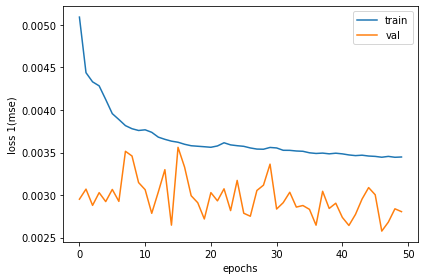

In [8]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(loss1, label='train')
plt.plot(val_loss1, label='val')
plt.xlabel('epochs')
plt.ylabel('loss 1(mse)')
plt.legend()
plt.tight_layout()



In [9]:
### CALCULO DAS MÉTRICAS E PLOTS
def get_zstatistic(preds1,y_test):
    
    
    deltaz=np.array(len(preds1))
    deltaz=[preds1[i]-y_test[i] for i in range(len(preds1))]
    mean_bias=np.mean(deltaz)


    p16=np.percentile(deltaz,15.85)
    p84=np.percentile(deltaz,84.05)
    sigma68=0.5*(p84-p16)
    median_bias=np.percentile(deltaz,50)
    return mean_bias,median_bias,sigma68
    

def redshift_plot(preds1, y_test):
    
    plt.style.use('default')
    
    fig = plt.figure(figsize=(10, 8))
    
    mean_bias,median_bias,sigma68=get_zstatistic(preds1, y_test)


    text="\n $\sigma_{68}$: $"+str(round(sigma68,3))+"$"
    text+="\n Mean Bias: $"+str(round(mean_bias,3))+"$"
    text+="\n Median Bias: $"+str(round(median_bias,3))+"$"
    ax = fig.add_subplot()
    
    #dispersão entre photo-z e spec-z
    ax.scatter(np.array(y_test), np.array(preds1),
                       alpha = 0.5,
                       s=8,marker='o')
    
    #reta x = y
    reta = [0, max([max(y_test), max(preds1)])]
    ax.plot(reta, reta,
              ls='dashed', color='black', lw=0.5)
    
    #limites e legendas
    ax.set_ylim(min(preds1),max(preds1))
    ax.set_xlim(0,max(y_test))
    ax.set_ylabel("$z_{phot}$", fontsize=15)
    ax.set_xlabel("$z_{spec}$", fontsize=15)
    ax.text(0.7*max(y_test), .2*max(preds1), text, va="top", fontsize=12)
    
    plt.show()

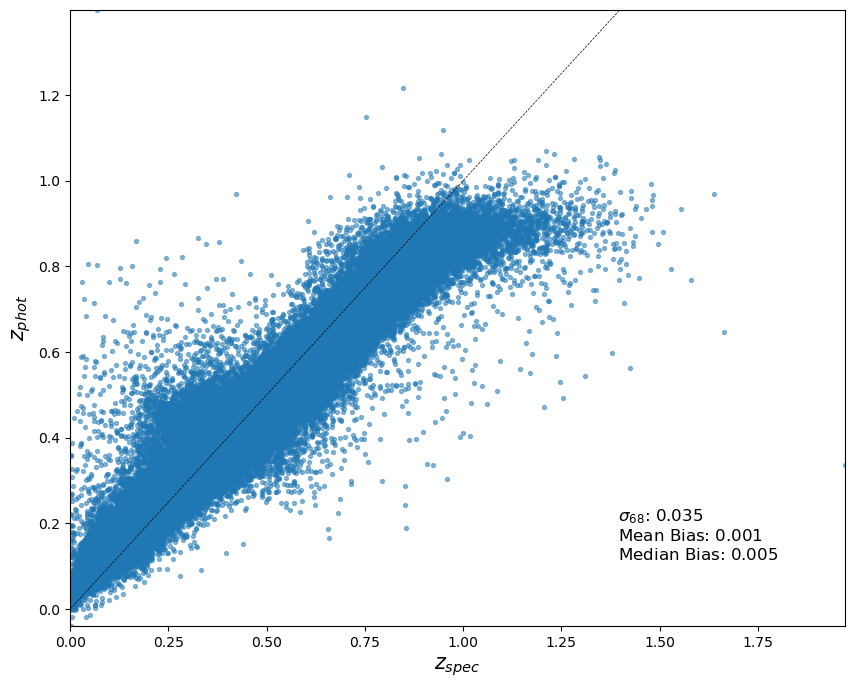

In [10]:
redshift_plot(preds1, y_test)

In [11]:
#para grupo 2

regressor2 = build_model(x_train2.shape[1:])
regressor2.compile(loss='mse', optimizer=keras.optimizers.Nadam(), metrics=['accuracy'])


batch_size = 36
epochs = 50
#epochs = 15

history2 = regressor2.fit(x_train2, y_train2, batch_size=batch_size, epochs=epochs, 
                     verbose=1, validation_data=(x_val2,y_val2))

preds2 = regressor2.predict(x_test)
regressor2.save('regressorg2')

Epoch 1/50
53599/53599 [==============================] - 179s 3ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 2/50
53599/53599 [==============================] - 176s 3ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 3/50
53599/53599 [==============================] - 176s 3ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 4/50
53599/53599 [==============================] - 176s 3ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 5/50
53599/53599 [==============================] - 177s 3ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 6/50
53599/53599 [==============================] - 176s 3ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 7/50
53599/53599 [==============================] - 176s 3

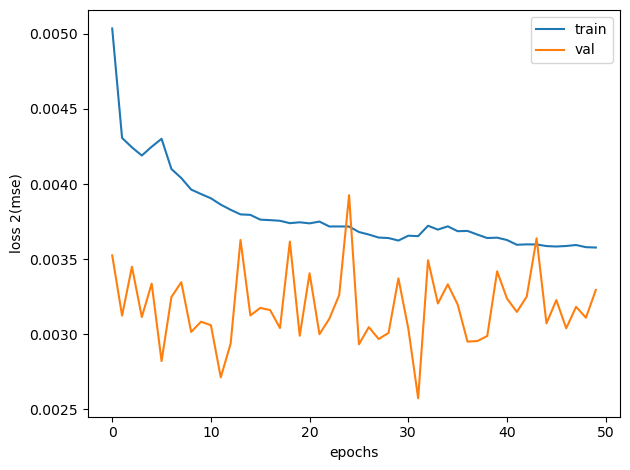

In [12]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.plot(loss2, label='train')
plt.plot(val_loss2, label='val')
plt.xlabel('epochs')
plt.ylabel('loss 2(mse)')
plt.legend()
plt.tight_layout()


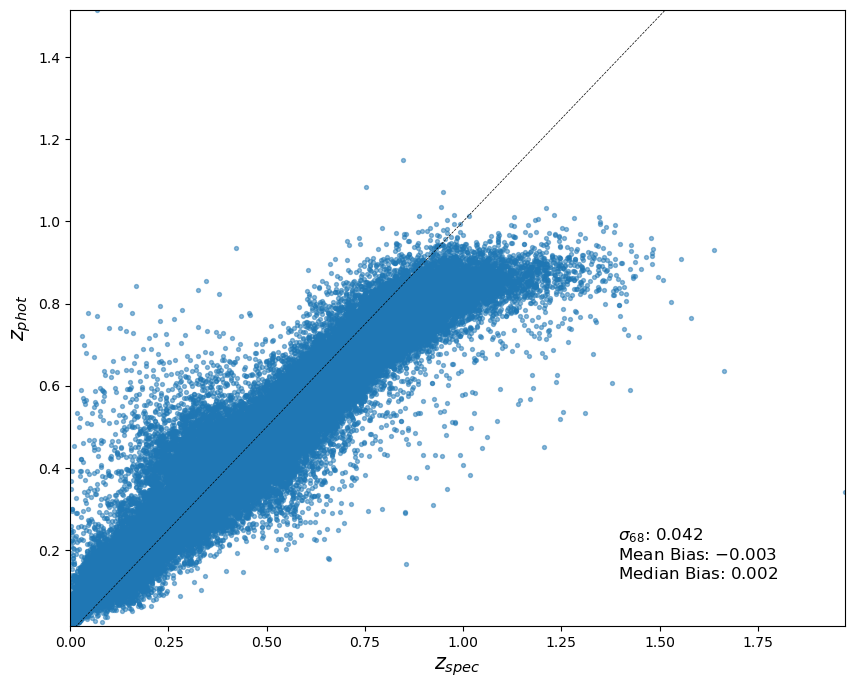

In [14]:
redshift_plot(preds2, y_test)

In [15]:
#para grupo 3

regressor3 = build_model(x_train3.shape[1:])
regressor3.compile(loss='mse', optimizer=keras.optimizers.Nadam(), metrics=['accuracy'])


batch_size = 36
epochs = 50
#epochs = 5

history3 = regressor3.fit(x_train3, y_train3, batch_size=batch_size, epochs=epochs, 
                     verbose=1, validation_data=(x_val3,y_val3))

preds3 = regressor3.predict(x_test)
regressor3.save('regressorg3')

Epoch 1/50
53609/53609 [==============================] - 179s 3ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 2/50
53609/53609 [==============================] - 178s 3ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 3/50
53609/53609 [==============================] - 177s 3ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 4/50
53609/53609 [==============================] - 178s 3ms/step - loss: 0.0044 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 5/50
53609/53609 [==============================] - 178s 3ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 6/50
53609/53609 [==============================] - 178s 3ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 7/50
53609/53609 [==============================] - 198s 4

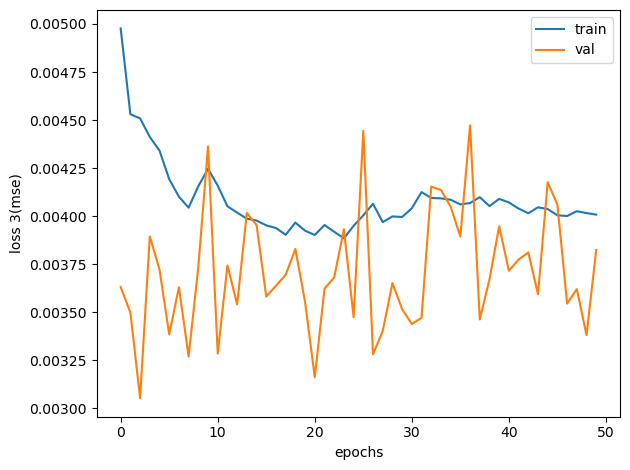

In [16]:
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

plt.plot(loss3, label='train')
plt.plot(val_loss3, label='val')
plt.xlabel('epochs')
plt.ylabel('loss 3(mse)')
plt.legend()
plt.tight_layout()


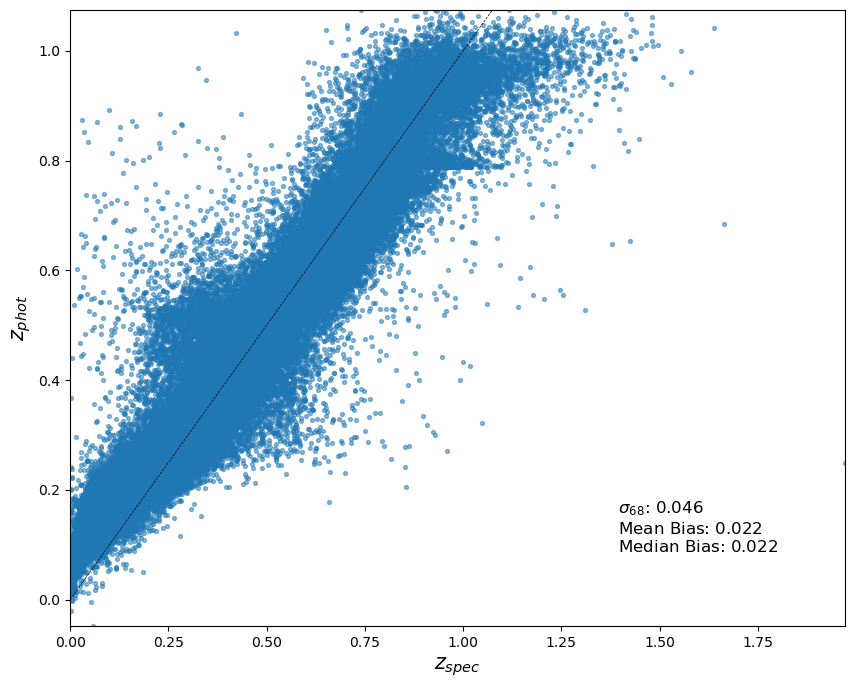

In [18]:
redshift_plot(preds3, y_test)

In [19]:
#para grupo 4

regressor4 = build_model(x_train4.shape[1:])
regressor4.compile(loss='mse', optimizer=keras.optimizers.Nadam(), metrics=['accuracy'])


batch_size = 36
epochs = 50
#epochs = 5

history4 = regressor4.fit(x_train4, y_train4, batch_size=batch_size, epochs=epochs, 
                     verbose=1, validation_data=(x_val4,y_val4))

preds4 = regressor4.predict(x_test)
regressor4.save('regressorg4')

Epoch 1/50
53613/53613 [==============================] - 195s 4ms/step - loss: 0.0051 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 2/50
53613/53613 [==============================] - 201s 4ms/step - loss: 0.0046 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 3/50
53613/53613 [==============================] - 194s 4ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 4/50
53613/53613 [==============================] - 194s 4ms/step - loss: 0.0044 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 5/50
53613/53613 [==============================] - 199s 4ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 6/50
53613/53613 [==============================] - 191s 4ms/step - loss: 0.0044 - accuracy: 0.0000e+00 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 7/50
53613/53613 [==============================] - 191s 4

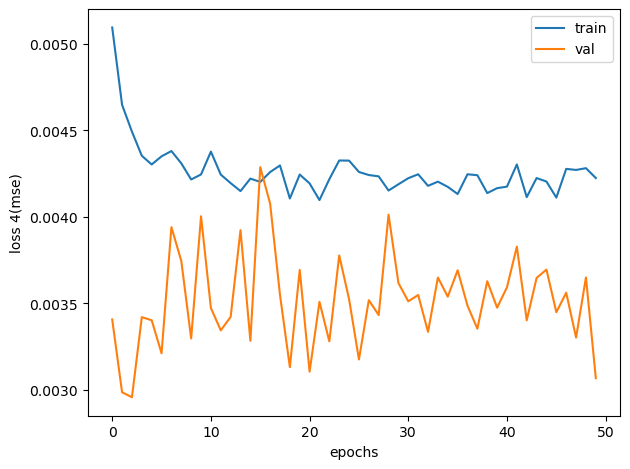

In [20]:
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

plt.plot(loss4, label='train')
plt.plot(val_loss4, label='val')
plt.xlabel('epochs')
plt.ylabel('loss 4(mse)')
plt.legend()
plt.tight_layout()


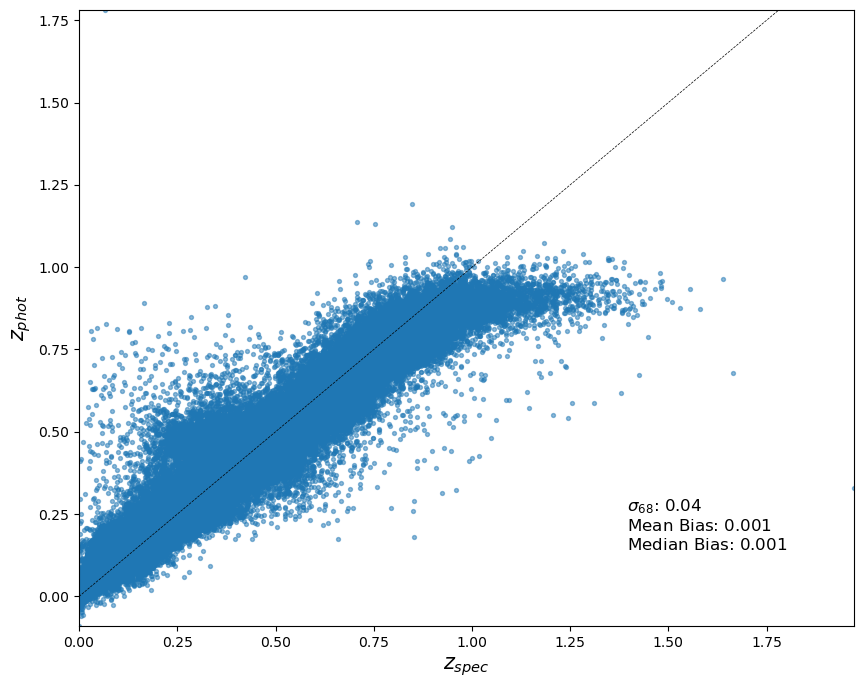

In [22]:
redshift_plot(preds4, y_test)

In [23]:
#para grupo 5

regressor5 = build_model(x_train5.shape[1:])
regressor5.compile(loss='mse', optimizer=keras.optimizers.Nadam(), metrics=['accuracy'])


batch_size = 36
epochs = 50
#epochs = 5

history5 = regressor5.fit(x_train5, y_train5, batch_size=batch_size, epochs=epochs, 
                     verbose=1, validation_data=(x_val5,y_val5))

preds5 = regressor5.predict(x_test)
regressor5.save('regressorg5')


Epoch 1/50
53579/53579 [==============================] - 197s 4ms/step - loss: 0.0051 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 2/50
53579/53579 [==============================] - 195s 4ms/step - loss: 0.0046 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 3/50
53579/53579 [==============================] - 188s 4ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 4/50
53579/53579 [==============================] - 193s 4ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 5/50
53579/53579 [==============================] - 193s 4ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 6/50
53579/53579 [==============================] - 190s 4ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 7/50
53579/53579 [==============================] - 189s 4

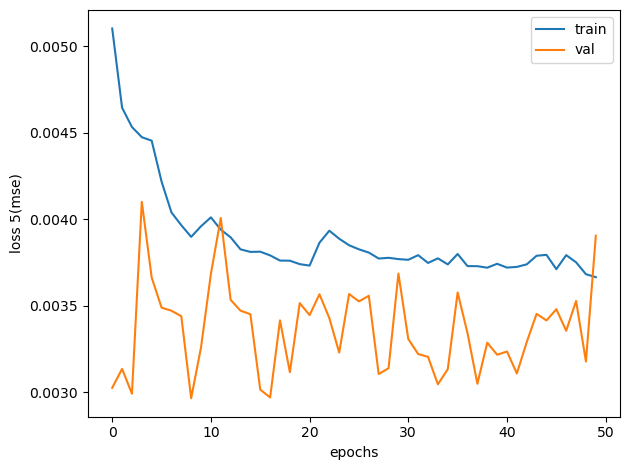

In [24]:
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

plt.plot(loss5, label='train')
plt.plot(val_loss5, label='val')
plt.xlabel('epochs')
plt.ylabel('loss 5(mse)')
plt.legend()
plt.tight_layout()

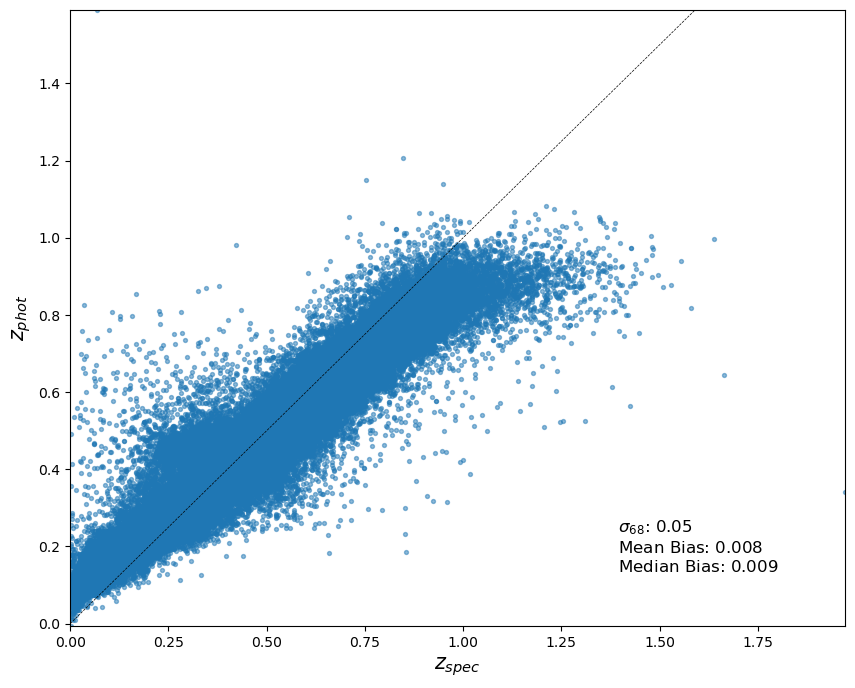

In [26]:
redshift_plot(preds5, y_test)